# Decision Trees
Sean Wade

In [2]:
from __future__ import division, print_function
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import pydotplus

from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://seanwade.com/jupyter.css').read())

## The Data

The goal of this dataset is predicting if breast cancer is malignant or benign.  It includes the following features:

['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [69]:
breast_cancer = load_breast_cancer()

In [14]:
data, labels = breast_cancer['data'], breast_cancer['target']
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=.7)

## Vanilla Model

In [2]:
%%timeit
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

NameError: global name 'DecisionTreeClassifier' is not defined

In [40]:
model.score(x_test, y_test)

0.91812865497076024

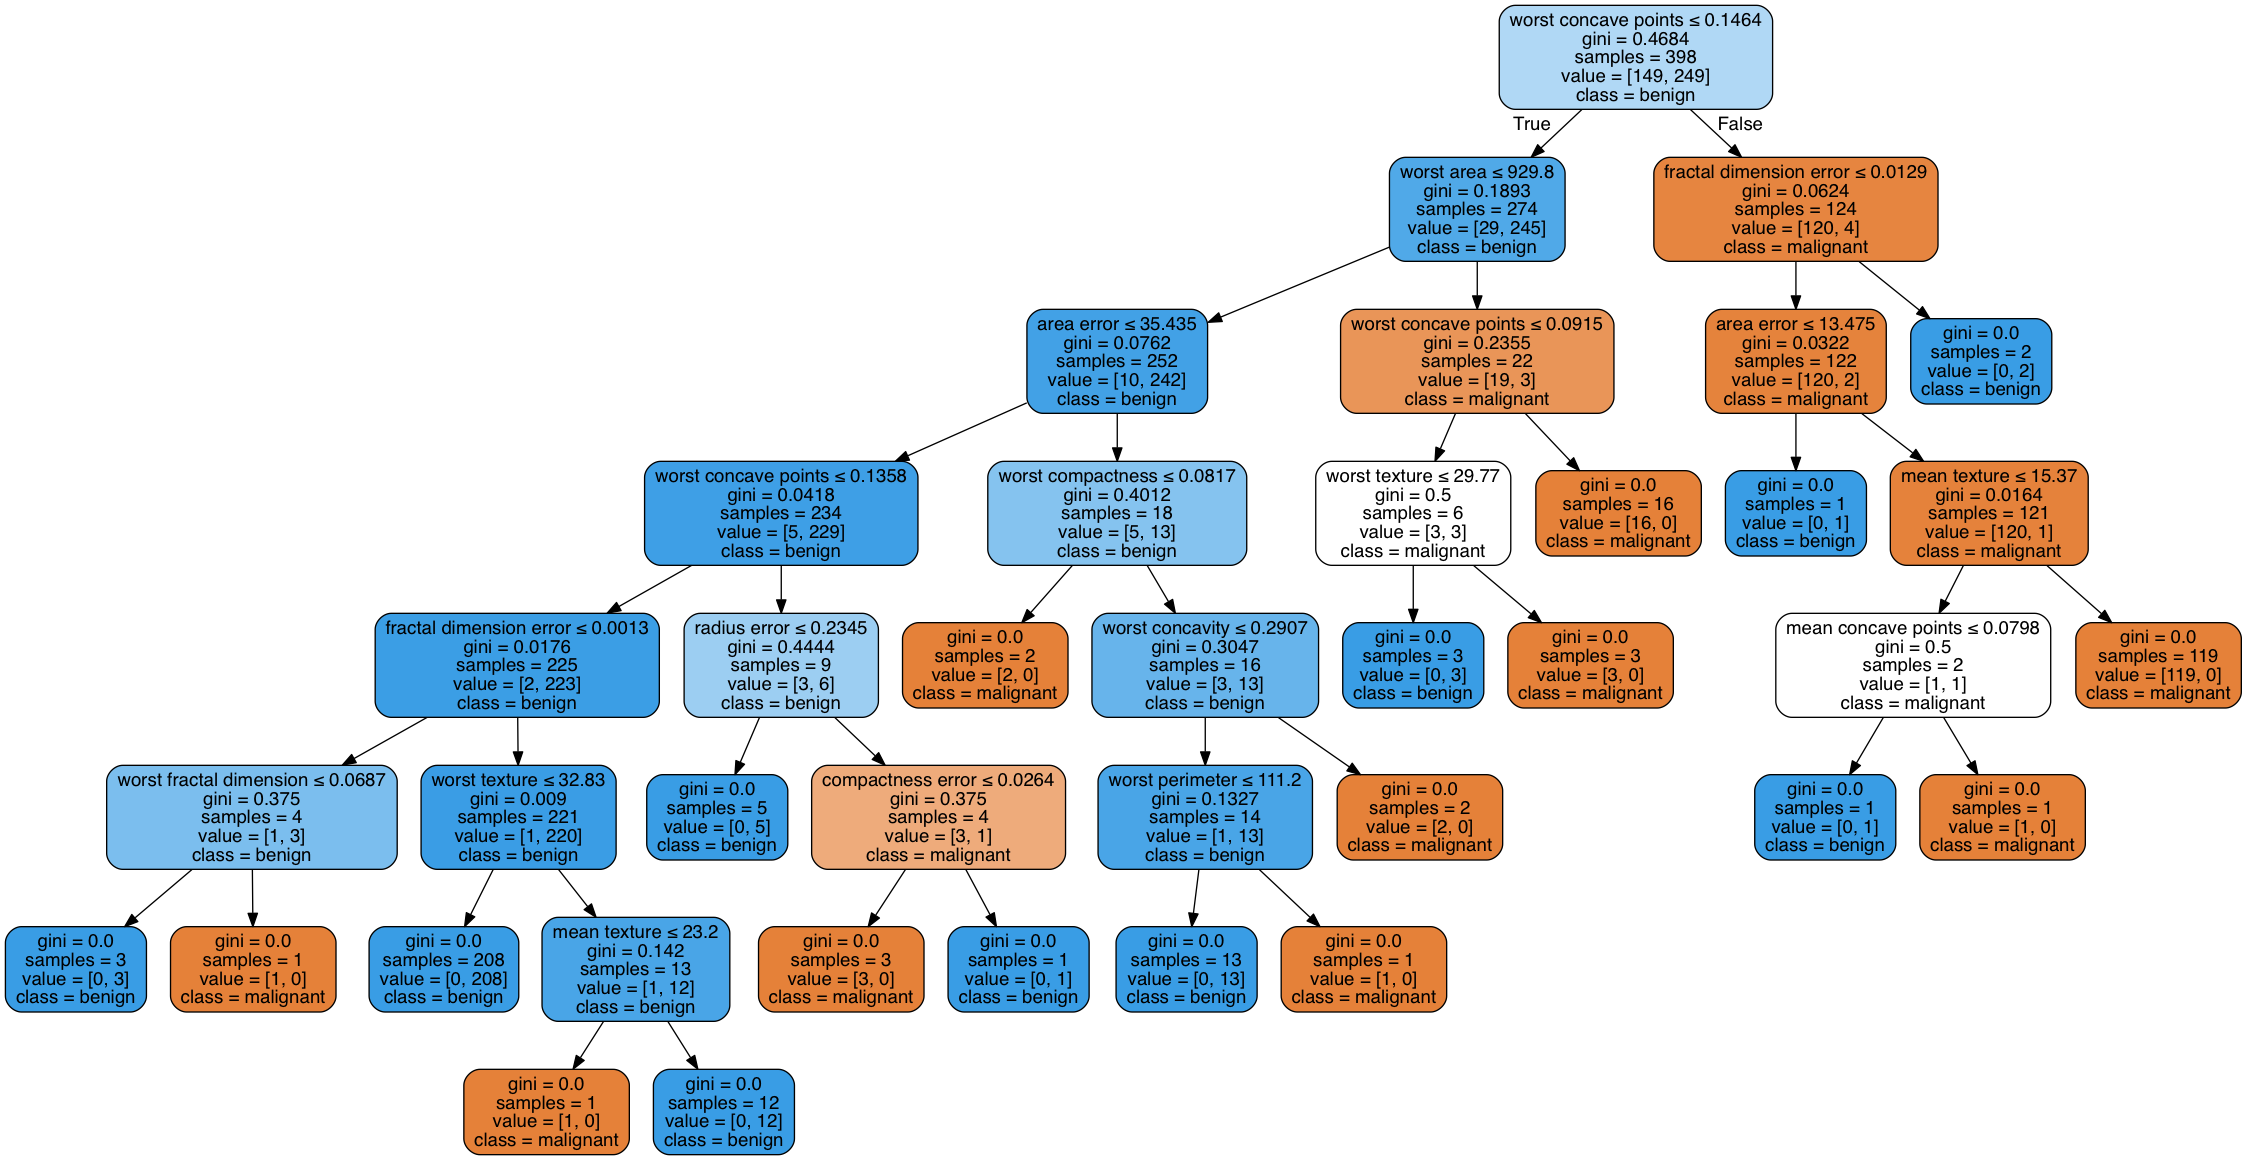

In [71]:
dot_data = tree.export_graphviz(model, out_file=None,
                        feature_names=breast_cancer['feature_names'],  
                         class_names=breast_cancer['target_names'],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  

## Adjusting Hyperparameters

In [142]:
parameters = {'max_depth':[5*x for x in range(1,6)], 
             'max_leaf_nodes': [5*x for x in range(1,6)],
             }
gs = GridSearchCV(model, parameters)
gs.fit(data, labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': [5, 10, 15, 20, 25], 'max_depth': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### Results

In [158]:
sort_idx = np.argsort(gs.cv_results_['mean_test_score'])[::-1]
params = np.array(gs.cv_results_["params"])[sort_idx]
time = gs.cv_results_["mean_fit_time"][sort_idx]
acc = gs.cv_results_["mean_test_score"][sort_idx]
for i in range(len(params)):
     print('Acc: %.3f' % acc[i], 'Time: %.4f' % time[i], params[i])

Acc: 0.930 Time: 0.0038 {'max_leaf_nodes': 10, 'max_depth': 10}
Acc: 0.923 Time: 0.0038 {'max_leaf_nodes': 10, 'max_depth': 5}
Acc: 0.923 Time: 0.0048 {'max_leaf_nodes': 10, 'max_depth': 25}
Acc: 0.923 Time: 0.0048 {'max_leaf_nodes': 20, 'max_depth': 5}
Acc: 0.923 Time: 0.0044 {'max_leaf_nodes': 10, 'max_depth': 20}
Acc: 0.921 Time: 0.0041 {'max_leaf_nodes': 10, 'max_depth': 15}
Acc: 0.917 Time: 0.0042 {'max_leaf_nodes': 15, 'max_depth': 5}
Acc: 0.914 Time: 0.0045 {'max_leaf_nodes': 15, 'max_depth': 15}
Acc: 0.914 Time: 0.0029 {'max_leaf_nodes': 5, 'max_depth': 10}
Acc: 0.912 Time: 0.0029 {'max_leaf_nodes': 5, 'max_depth': 25}
Acc: 0.912 Time: 0.0042 {'max_leaf_nodes': 20, 'max_depth': 20}
Acc: 0.912 Time: 0.0032 {'max_leaf_nodes': 5, 'max_depth': 20}
Acc: 0.910 Time: 0.0035 {'max_leaf_nodes': 5, 'max_depth': 15}
Acc: 0.910 Time: 0.0032 {'max_leaf_nodes': 5, 'max_depth': 5}
Acc: 0.909 Time: 0.0043 {'max_leaf_nodes': 25, 'max_depth': 5}
Acc: 0.909 Time: 0.0041 {'max_leaf_nodes': 25, 'ma

The best results were leaf nodes and depth that was in the median.  This is because if there are too many nodes decision trees are high variance estimators prone to overfit.  When it is any smaller that 5 leaf nodes it can not partition the data enough.